In [1]:
# import modules
import dawdreamer as daw
import numpy as np
import os
from scipy.io.wavfile import write
from utils import *

In [2]:
# define constants
SAMPLE_RATE = 22050
BUFFER_SIZE = 128 # Parameters will undergo automation at this buffer/block size.
PPQN = 960 # Pulses per quarter note.
SYNTH_PLUGIN = "/Library/Audio/Plug-Ins/VST3/TAL-U-NO-LX-V2.vst3"  # extensions: .dll, .vst3, .vst, .component
SYNTH_NAME = "TAL-Uno"
PRESET_FOLDER = "/Users/malek8/Library/Application Support/ToguAudioLine/TAL-U-No-LX/presets"
PRESET_EXT = ".pjunoxl"
DURATION = 5  # in seconds
NOTE = 'A4'  # Western Scale

In [3]:
# create a RenderEngine object
test = np.array([1,2,3,4,5])
engine = daw.RenderEngine(sample_rate=SAMPLE_RATE, block_size=BUFFER_SIZE) # what does block_size do?

# create the plugin object
plugin = engine.make_plugin_processor(SYNTH_NAME, SYNTH_PLUGIN)
assert plugin.get_name() == SYNTH_NAME

error: attempt to map invalid URI `/Library/Audio/Plug-Ins/VST3/TAL-U-NO-LX-V2.vst3'


In [4]:
# randomly select a preset from the preset folder
preset_path = select_preset_path(PRESET_FOLDER,PRESET_EXT)

In [5]:
# create JSON parameter map and save it
json_file_name = make_json_parameter_mapping(plugin,preset_path,verbose=False)

In [6]:
# apply the synth preset settings to the synth plugin processor object
loaded_preset_synth = load_xml_preset(plugin,json_file_name)

In [7]:
# convert the piano note to midi (0 to 127)
midi_note = piano_note_to_midi_note(NOTE)

# generate a sound using the plugin
loaded_preset_synth.add_midi_note(midi_note, 60, 0.0, 3)

engine.load_graph([(loaded_preset_synth, [])])

# loaded_preset_synth.open_editor()
engine.render(DURATION)

audio = engine.get_audio()

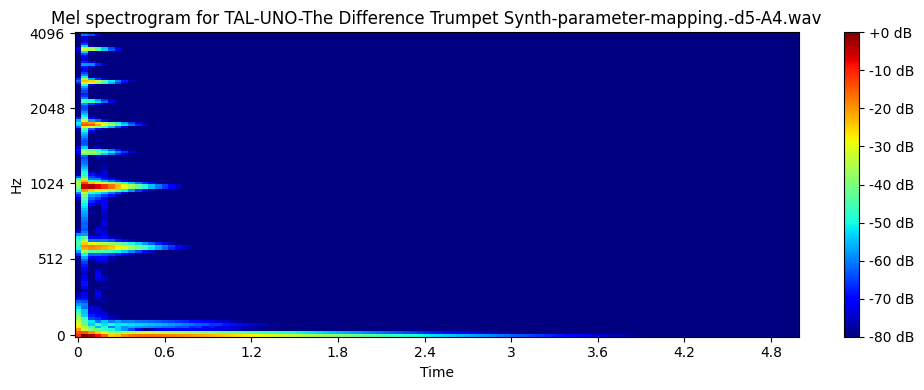

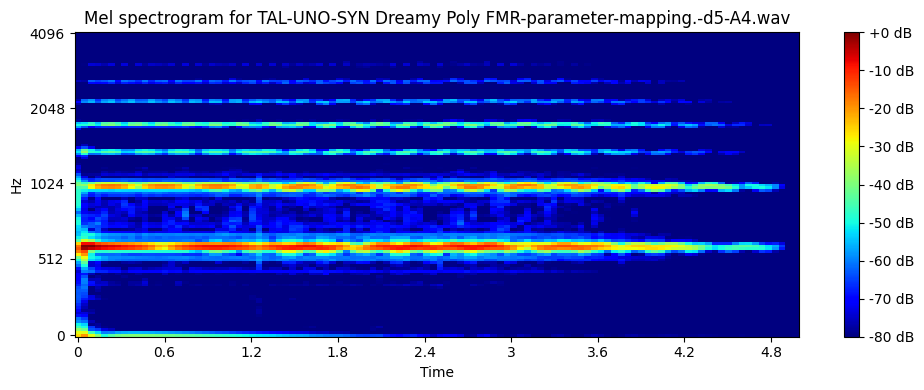

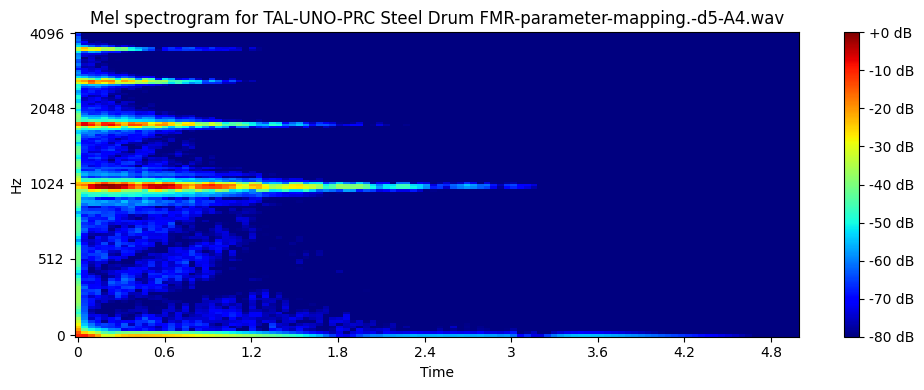

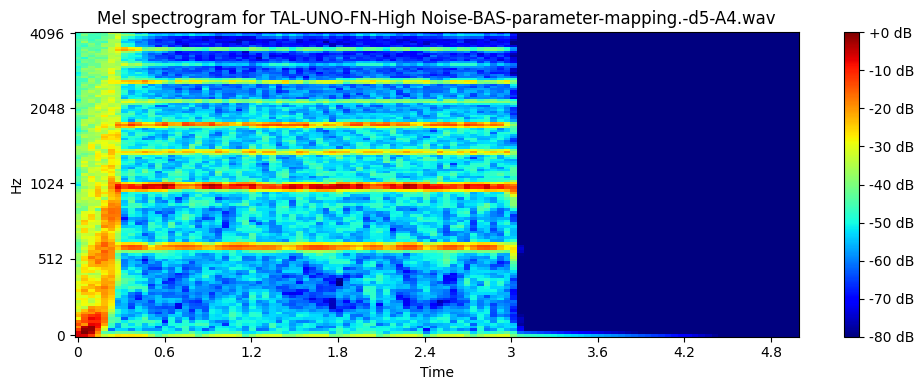

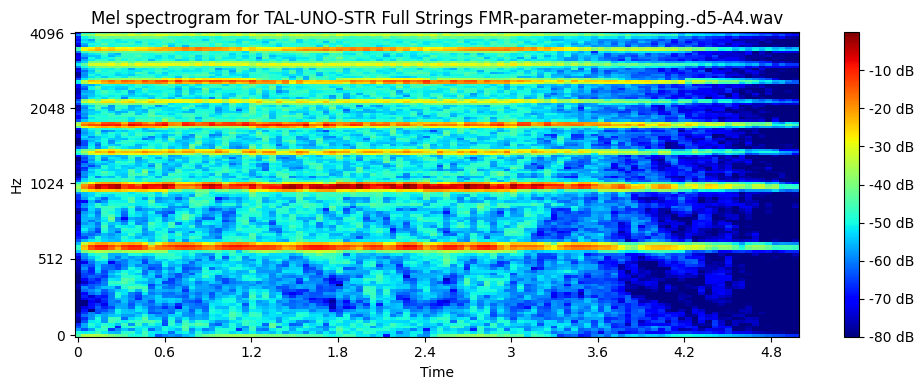

In [8]:
# make the diectory if it does not exist
if not os.path.exists(f'output'):
    os.mkdir(f'output')

# write the output to a WAV file
out_name = json_file_name.split(os.sep)[-1].split('json')[0]
write(f'output{os.sep}{out_name}-d{DURATION}-{NOTE}.wav', SAMPLE_RATE, audio[0,:])

# get the spectrogram
spec = audio2mel_spectrogram(audio_folder_path=f'output',plot_flag=True,zero_padding_factor=1,range_db=80,gain_db=20, n_mels=128, f_max=4096)